In [1]:
!pip install -q pyomo

In [2]:
from pyomo.environ import *

###Question 1 : Fix p = 1. Write a linear optimization problem using the objective provided in the description. You may assume that $a_{0} ≥ 0 ,a_{1}, a_{2}$ do not have bounds on them.

###Answer : 

Objective Function : As it was given in Question we need to minimize $\sum_{i=1}^{6}|Q_{i}|^{p}$ where $Q_{i} = R_{i} - \vec{R_{i}}$ .Where $\vec{R_{i}}$  is the estimated revenue so $\vec{R_{i}}  = a_{0} + a_{1}T_{i} + a_{2}D_{i} $, Here $a_{0},a_{1},a_{2}$ are unknown

Constraints :  $a_{0} >=0 ; a_{1},a_{2} \in \mathbb{R} $

Here p = 1 and we need to convert the problem into linear optimization problem 

Let $Q_{i} = y_{i 0} - y_{i 1};y_{i 0},y_{i 1}>=0 $  Reason : Every Real Number can be written as difference of  two  non - negative real numbers. 

So for Min  $\sum _{i=1}^{6} |Q_{i}|$ where  $|Q_{i}| = |y_{i 0} - y_{i 1}| \implies y_{i 0} +  y_{i 1} $

Reason As it is minimization problem and at the minimum value either $y_{i 0} or y_{i 1}$ = 0 or both 0 so we can write  |$y_{i 0} - y_{i 1}|$ as $ y_{i 0} +  y_{i 1} $

So the new constraints are $Q_{i} = y_{i 0} - y_{i 1}$,$y_{i 0},y_{i 1}>=0 \forall $ i = {1,2,3,4,5,6}  $a_{0} >=0 ; a_{1},a_{2} \in \mathbb{R} $

So the new objective function is $\sum_{i=1}^{6} y_{i 0}+y_{i 1}$

In [3]:
model = ConcreteModel()

In [4]:
row_indices = range(6)
col_indices = range(2)

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("lab8_ex2.csv")

In [7]:
df

Video(i)    Ri    Vi     Bi   Ai        Di         Ti
0         1   175   945   2800   23  0.024339   2.962963
1         2   450   832   3900   40  0.048077   4.687500
2         3  1050  2007  24900   78  0.038864  12.406577
3         4   900   800  36450   64  0.080000  45.562500
4         5    19   780    366    4  0.005128   0.469231
5         6  3550  5005  38500  150  0.029970   7.692308

In [8]:
model.y = Var(row_indices,col_indices,domain = NonNegativeReals)
model.a = Var(range(3))

In [9]:
model.a[0].domain = NonNegativeReals

In [10]:
model.cost = Objective(expr = sum(model.y[i,j] for i in row_indices for j in col_indices))

In [11]:
model.constraints = ConstraintList()

In [12]:
for i in row_indices:
  model.constraints.add(expr = (df['Ri'][i]-model.a[0]-model.a[1]*df['Ti'][i]-model.a[2]*df['Di'][i])==(model.y[i,0]-model.y[i,1]))

In [13]:
model.pprint()

5 Set Declarations
    a_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {1, 2, 3, 4, 5, 6}
    y_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain              : Size : Members
        None :     2 : y_index_0*y_index_1 :   12 : {(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1), (5, 0), (5, 1)}
    y_index_0 : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {0, 1, 2, 3, 4, 5}
    y_index_1 : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    2 : {0, 1}

2 Var Declarations
    a : Size=3, Index=a_index
        Key : Lower : Value : Upper : Fixed : Stale : 

In [14]:
!apt-get install -y -qq coinor-cbc

In [15]:
opt_cbc = SolverFactory('cbc')

In [16]:
result = opt_cbc.solve(model)
print('Solver status: ',result.solver.status)
print('Solver termination condition: ',result.solver.termination_condition)

Solver status:  ok
Solver termination condition:  optimal


In [17]:
print(model.cost())

3986.158757


In [18]:
for i in range(3):
  print(f"a[{i}]=",model.a[i]())

a[0]= 0.0
a[1]= 4.0039722
a[2]= 8969.6127


In [27]:
df["Ri_for_p=1"] = model.a[0].value +model.a[1].value*df["Ti"]+model.a[2].value*df["Di"]
df

Video(i)    Ri    Vi     Bi   Ai        Di         Ti  Ri_for_p=1
0         1   175   945   2800   23  0.024339   2.962963  230.171655
1         2   450   832   3900   40  0.048077   4.687500  450.000000
2         3  1050  2007  24900   78  0.038864  12.406577  398.270403
3         4   900   800  36450   64  0.080000  45.562500  899.999999
4         5    19   780    366    4  0.005128   0.469231   47.876801
5         6  3550  5005  38500  150  0.029970   7.692308  299.619348

###Question 4 : Solve the linear program using cbc solver, report the solver status, solver termination condition, optimal solution values for the decision variables, and the optimal objective function value. Comment on your observations

###Answer 4 : 
* Solver status:  ok
* Solver termination condition:  optimal
* Optimal objective function Value : 3986.158757
* Decision Variable Values : $a_{0}= 0.0,a_{1}= 4.0039722,a_{2}= 8969.6127$

Looking at the actual revenue and estimated revenue for p = 1 we can see that for Video 6 the difference between the estimated and actual revenue is higher and for video 2,4 the difference between the estimated and actual revenue is same and for video 3 the estimated revenue is less than half of actual revenue
and for video 5 the actual revenue is less than half of estimated revenue, for video 1 the estimated revenue is higher than actual revenue

###Question 5 : Now, consider p > 1. Write a general nonlinear optimization problem for p > 1. You may assume that a0 ≥ 0 and a1, a2 do not have bounds on them.

###Answer :  The Optimization problem will be for p > 1

* Objective function : Min $\sum_{i=1}^{6} |Q_{i}|^{p}$  where $Q_{i} = R_{i} - \vec{R_{i}}$ .Where $\vec{R_{i}}$  is the estimated revenue so $\vec{R_{i}}  = a_{0} + a_{1}T_{i} + a_{2}D_{i} $ $ a_{0} \ge 0$ $a_{1},a_{2} \in \mathbb{R}$ as we can't write the modulus directly in ipopt solver so we can write the Objective Function can be written as $\sum_{i=1}^{6} (((R_{i} -a_{0}-a_{1}T_{i}-a_{2}D_{i})^{2})^{0.5})^p$ : Reason $|X| = \sqrt{x^{2}}$

* Constraints : We have only one bound constraint that is $a_{0} >=0 ; a_{1},a_{2} \in \mathbb{R} $

In [20]:
!wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
!unzip -o -q ipopt-linux64  
solver = SolverFactory('ipopt', executable='/content/ipopt')     

In [21]:
def function(p):
  model = ConcreteModel()
  row_indices = range(6)
  col_indices = range(2)
  model.y = Var(row_indices,col_indices,domain = NonNegativeReals)
  model.a = Var(range(3),initialize =(0,0,0))
  model.a[0].domain = NonNegativeReals
  model.cost = Objective(expr = sum((((df['Ri'][i]-model.a[0]-model.a[1]*df['Ti'][i]-model.a[2]*df['Di'][i])**2)**0.5)**p for i in row_indices))
  results = solver.solve(model)
  print(results)
  print("Model Cost = ",model.cost())
  for i in range(3):
    print(f"a[{i}]=",model.a[i].value)

In [22]:
function(1.5)


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 3
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02976703643798828
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Model Cost =  188066.92411837948
a[0]= 503.740594298034
a[1]= 2.7235995181734562
a[2]= 4802.719651956229


In [25]:
function(2)


Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 3
  Sense: unknown
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.04347872734069824
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Model Cost =  8399946.937132299
a[0]= 884.3228472420147
a[1]= 1.856237161978162
a[2]= 3097.069876951096


###Question 7 : Solve the respective non-linear optimization problems for p = 1.5, 2 using ipopt solver,and for each p value report the solver status, solver termination conditions, time taken by solver, optimal solution values for the decision variables, and the optimal objective function value. Comment on your observations.

###Answer 

For p = 1.5

* Solver Status : ok
* Solver Termination Condition : Optimal
* Time taken to solve : 0.02976703643798828
* Objective Function value : 188066.92411837948

Decision Variables :  
* a[0]= 503.740594298034
* a[1]= 2.7235995181734562
* a[2]= 4802.719651956229

For p = 2

* Solver Status : ok
* Solver Termination Condition : Optimal
* Time taken to solve : 0.04347872734069824
* Objective Function value : 8399946.937132299

Decision Variables :
* a[0]= 884.3228472420147
* a[1]= 1.856237161978162
* a[2]= 3097.069876951096


Observations : 
* $a_{0}$ for p = 1.5 is lower  than p = 2
* $a_{1}$ for p = 1.5 is higher than p = 2
* $a_{2}$ for p = 1.5 is higher than p = 2


In [28]:
# for 1.5 
a_0= 503.740594298034
a_1= 2.7235995181734562
a_2= 4802.719651956229
df["Ri_for_p=1.5"] = a_0+a_1*df['Ti']+a_2*df['Di']

In [29]:
# for 2
a_0= 884.3228472441534
a_1= 1.8562371619824636
a_2= 3097.0698770592785

df["Ri_for_p=2"] = a_0+a_1*df['Ti']+a_2*df['Di']

In [30]:
df

Video(i)    Ri    Vi     Bi   Ai        Di         Ti  Ri_for_p=1  \
0         1   175   945   2800   23  0.024339   2.962963  230.171655   
1         2   450   832   3900   40  0.048077   4.687500  450.000000   
2         3  1050  2007  24900   78  0.038864  12.406577  398.270403   
3         4   900   800  36450   64  0.080000  45.562500  899.999999   
4         5    19   780    366    4  0.005128   0.469231   47.876801   
5         6  3550  5005  38500  150  0.029970   7.692308  299.619348   

   Ri_for_p=1.5   Ri_for_p=2  
0    628.702108   965.201229  
1    747.407450  1041.921549  
2    724.183923  1027.716846  
3   1012.052170  1216.663243  
4    529.647923   901.076260  
5    668.629012   991.420872

In [31]:
import matplotlib.pyplot as plt

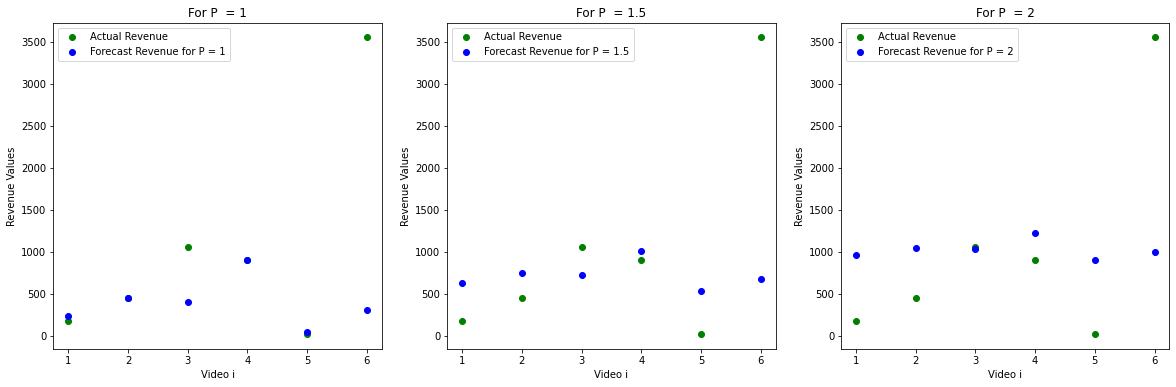

In [45]:
fig,axes = plt.subplots(nrows = 1,ncols = 3,figsize = (20,6))
axes[0].scatter(df["Video(i)"],df["Ri"],color = "Green",label = "Actual Revenue")
axes[0].scatter(df["Video(i)"],df["Ri_for_p=1"],color ="Blue",label = "Forecast Revenue for P = 1")
axes[0].set_xlabel("Video i")
axes[0].set_ylabel("Revenue Values")
axes[0].legend()
axes[0].set_title("For P  = 1")
axes[1].scatter(df["Video(i)"],df["Ri"],color = "Green",label = "Actual Revenue")
axes[1].scatter(df["Video(i)"],df["Ri_for_p=1.5"],color ="Blue",label = "Forecast Revenue for P = 1.5")
axes[1].set_xlabel("Video i")
axes[1].set_ylabel("Revenue Values")
axes[1].legend()
axes[1].set_title("For P  = 1.5")
axes[2].scatter(df["Video(i)"],df["Ri"],color = "Green",label = "Actual Revenue")
axes[2].scatter(df["Video(i)"],df["Ri_for_p=2"],color ="Blue",label = "Forecast Revenue for P = 2")
axes[2].set_xlabel("Video i")
axes[2].set_ylabel("Revenue Values")
axes[2].legend()
axes[2].set_title("For P  = 2");

###Question 8 : For each value of p ∈ {1, 1.5, 2}, prepare different plots depicting the actual revenue Ri and the forecast value Ri obtained using your optimization models for the data provided. Based on the plots, comment with suitable justifications if the forecast model that you have assumed would be good fit for the given data.

###Answer : 
For p = 1, We can see that distance between the actual revenues and estimated revenues is low for videos 1,2,4,5 compared to video 3,5 .So it is good fit for points 1,2,4 compared to 3,6 .

For p = 1.5, We can see that difference for video 4 is less compared to video 1,2,3,5 and for video 6 the difference is higher compared to all . So we can see that for points 4 it look like a good fit compared to 1,2,3,5,6

For p = 2, Looking at all the graphs we can see that difference of video 6 is reduced more compared to p = 1, p = 1.5 and we can see that overal/  the distance of the points are almost same difference so we can see that it is like same kind of fit for all videos 

In [53]:
for i in [1,1.5,2]:
  a = sum((df["Ri"]-df[f"Ri_for_p={i}"])**2)/6
  print(f"Mean Square Error For p = {i} is",a)

Mean Square Error For p = 1 is 1832267.272444729
Mean Square Error For p = 1.5 is 1496011.4453404294
Mean Square Error For p = 2 is 1399991.1561887162


###Question 9 : Based on your results and plots, suggest using appropriate reasons which value of p is good for your problem among the three different choices you tried.

###Answer 9 : Looking at the graphs and Mean Square Errors we can see that For p = 2 the mean square error is minimum so we can see it is better estimate compared to p = 1,p=1.5